The NN approximation $\tilde{f}^{{\tt NN}_J}_{\tilde\phi}$ of the log-spacing function is fitted to the data by minimizing some distance between two estimations of the $  N=(n-1)(n-2)/2 $ log-spacings:
$$
	\hat\phi=argmin_{\tilde\phi\in\Phi} \frac{1}{N} \sum_{k=2}^{n-1}\sum_{i=1}^{k-1} \Big|{	\hat{S}_{i,k} - {\tilde{f}^{{\tt NN}_J}_{\tilde\phi}}(\log(k/i),\log(n/k))}\Big|^s, \; s\in\{1,2\},
$$
where, for $ i=1,\dots,k-1 $ and  $ k=2,\dots,n-1$, $\hat S_{i,k}:=\log\left(X_{n-i+1,n}\right) - \log\left({X_{n-k+1,n}}\right)$
is the empirical estimate of $\log q(1-i/n)-\log q(1-k/n)$.

In [177]:
import torch
import numpy as np
import pandas as pd

from models import model_selection, get_best_crit, model_evaluation
from extreme.estimators import evt_estimators
from extreme import visualization as simviz

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Training plot

In [169]:
# Find the best epoch for each considered criteria
get_best_crit(filename="2022-05-03_09-55-01-rep5")

variance r_variance        mad     r_mad        aad     r_aad
epoch           15        168          3       384         15       166
value  7651.147461   0.012335  11.767494  0.054773  65.545372  0.086299

## Regression
Log-spacing function  associated with a Burr distribution ($ \gamma=1, \rho=-1/4 $). Refer to the \textit{_config_summary.csv} to get the distribution of the associated NN model filename.

Black curve: theoretical function $x_1\mapsto f(x_1, \log(n/k)) $, green dots: empirical pointwise estimation $ (\log(k/i), \log X_{n-i+1, n} - \log X_{n-k+1, n}) $, purple point: NN estimation $ x_1\mapsto \tilde f_{\hat\phi}^{{\rm NN}_J}(x_1, \log(n/k)) $ with $ i=1,\dots,k-1 $, $ k $ and $n$ are fixed.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


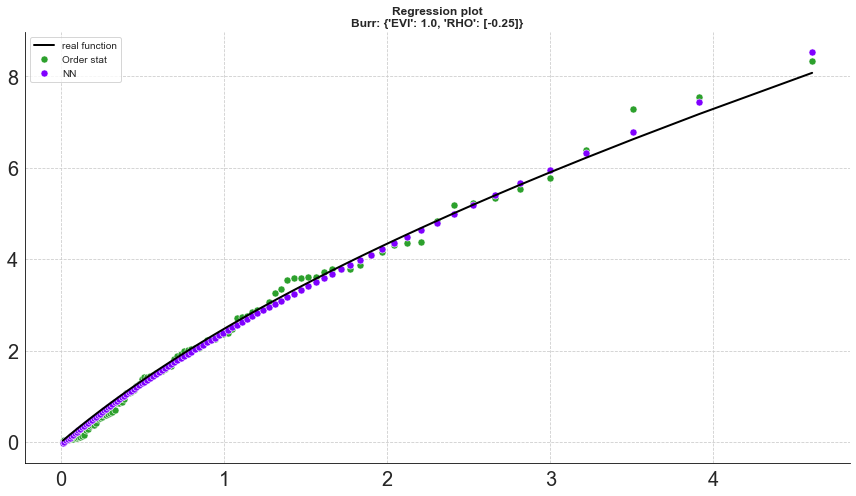

In [185]:
simviz.training_plot(k_anchor=100, show_as_video=False, epoch=495, saved=False,
                      NN="2022-05-03_09-55-01-rep5")

# NN estimator quantile plot

## Burr

### gamma=1 | rho=-0.125

In [179]:
model_selection(distribution="burr", params={"evi":1., "rho":[-0.125]}, n_replications=500)

running 2022-01-21_16-49-07 ...


filename      value rmse_bestK
NN_5 variance    2022-01-21_16-49-07  11.605221   0.312964
     r_variance  2022-01-21_16-49-07   0.038109  15.582322
     mad         2022-01-21_16-49-07   1.778511   0.313307
     r_mad       2022-01-21_16-49-07   0.109963   13.01115
     aad         2022-01-21_16-49-07   2.585648    0.31857
     r_aad       2022-01-21_16-49-07   0.153562  13.518114

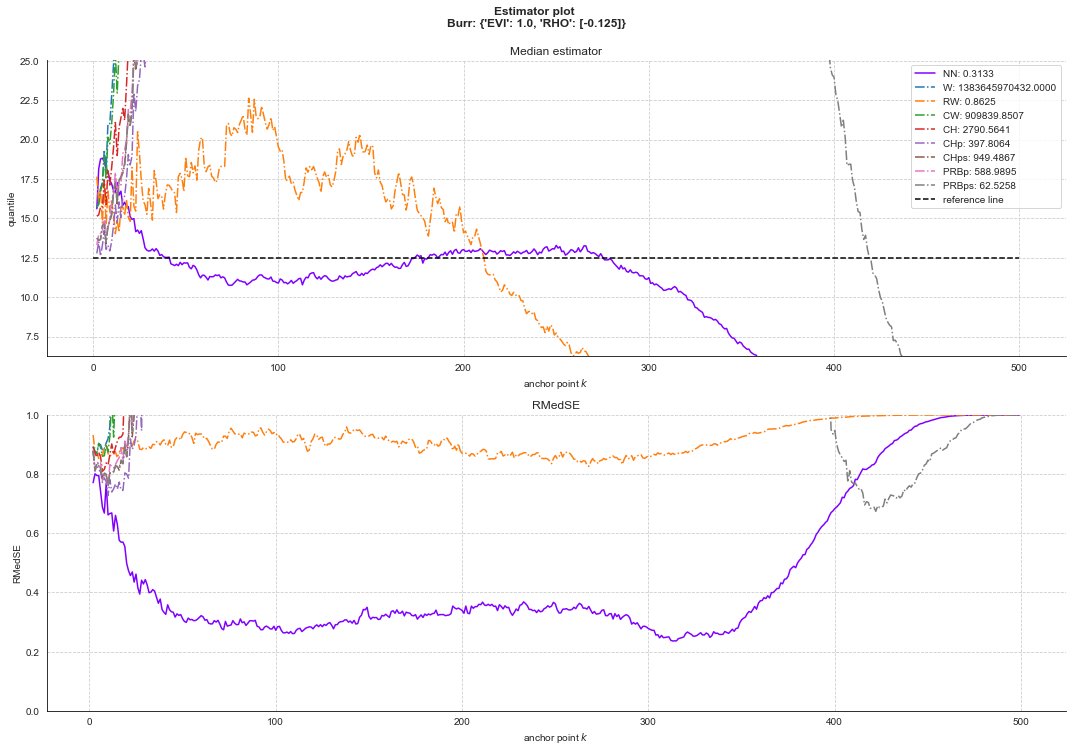

In [180]:
simviz.xquantile_plot(NN="2022-01-21_16-49-07")

### gamma=1 | rho=-0.25

In [47]:
model_selection_sim(n_replications=500, distribution="burr", params={"evi":1., "rho":[-0.25]})

running 2022-01-22_00-11-07 ...


filename        value rmse_bestK
NN_4 variance    2022-01-22_00-11-07  4696.129883    0.21986
     r_variance  2022-01-22_00-11-07     0.011621   1.566198
     mad         2022-01-22_00-11-07    35.823242   0.196182
     r_mad       2022-01-22_00-11-07     0.060155   1.045549
     aad         2022-01-22_00-11-07    52.642286   0.210606
     r_aad       2022-01-22_00-11-07     0.083725   1.420312

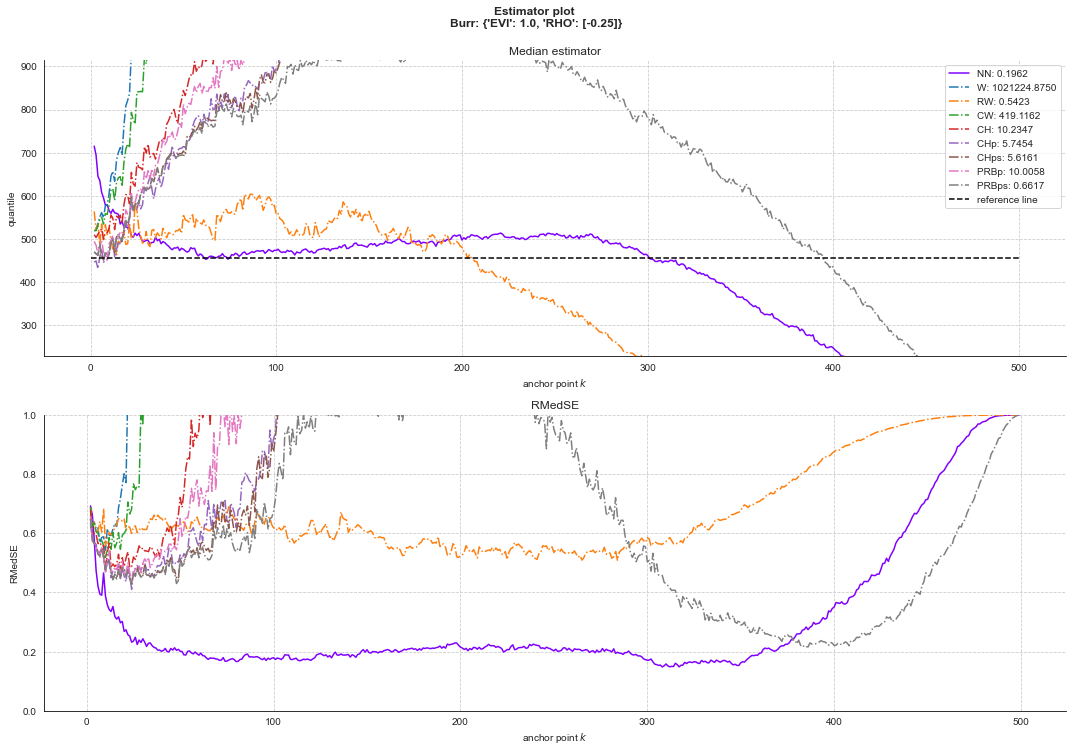

In [49]:
simviz.xquantile_plot(NN="2022-01-22_00-11-07")

### gamma=1 | rho=-0.5

In [44]:
model_selection_sim(distribution="burr", params={"evi":1., "rho":[-0.5]}, n_replications=500)

running 2022-01-22_10-47-22 ...
running 2022-01-31_16-03-02 ...


filename        value rmse_bestK
NN_4 variance    2022-01-22_10-47-22  4156.220215   0.196775
     r_variance  2022-01-22_10-47-22      0.00392   0.460444
     mad         2022-01-22_10-47-22    36.881203   0.214216
     r_mad       2022-01-22_10-47-22     0.033847     0.4498
     aad         2022-01-22_10-47-22    49.681091   0.195188
     r_aad       2022-01-22_10-47-22     0.048012   0.461156
NN_5 variance    2022-01-31_16-03-02  5422.936523   0.383905
     r_variance  2022-01-31_16-03-02     0.003771   0.472803
     mad         2022-01-31_16-03-02    39.114929   0.386482
     r_mad       2022-01-31_16-03-02     0.033276   0.438201
     aad         2022-01-31_16-03-02    55.342495   0.390559
     r_aad       2022-01-31_16-03-02     0.047255   0.473994

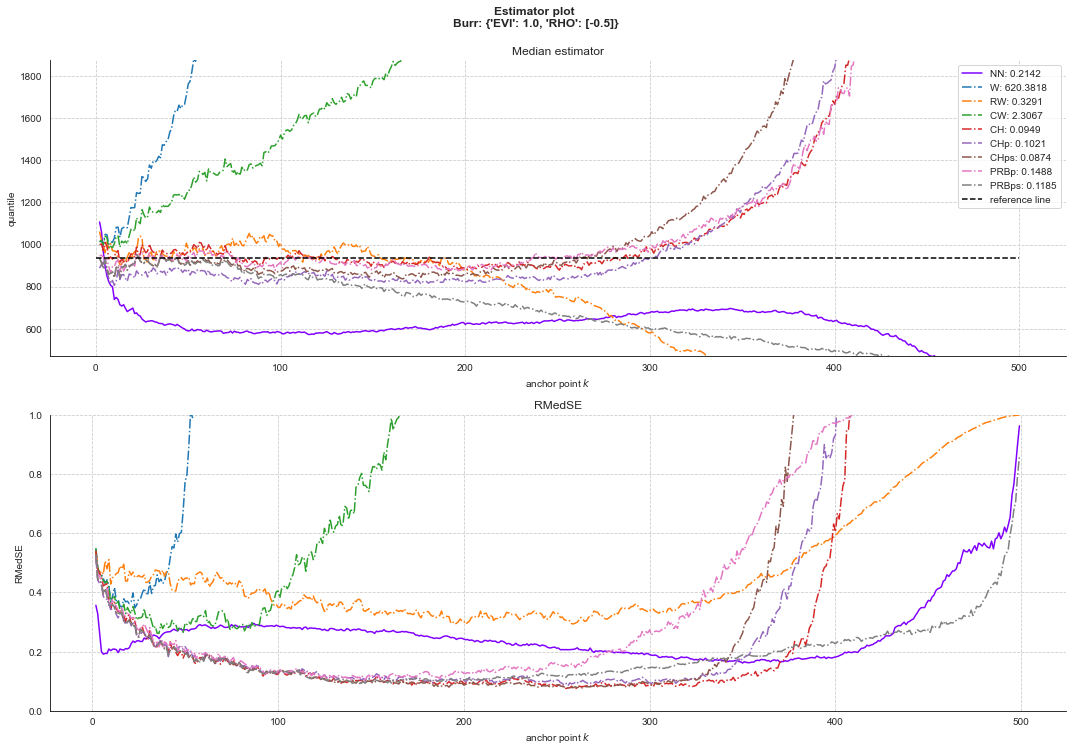

In [51]:
simviz.xquantile_plot(NN="2022-01-22_10-47-22")

### gamma=1 | rho=-1

In [45]:
model_selection_sim(distribution="burr", params={"evi":1., "rho":[-1.]}, n_replications=500)

running 2022-01-22_10-47-52 ...
running 2022-01-31_15-30-29 ...


filename        value rmse_bestK
NN_4 variance    2022-01-22_10-47-52  1960.038452   0.236901
     r_variance  2022-01-31_15-30-29     0.001838   0.259536
     mad         2022-01-22_10-47-52    21.684937   0.187693
     r_mad       2022-01-31_15-30-29     0.020932   0.258464
     aad         2022-01-22_10-47-52    33.575434   0.204626
     r_aad       2022-01-31_15-30-29     0.031516   0.257144

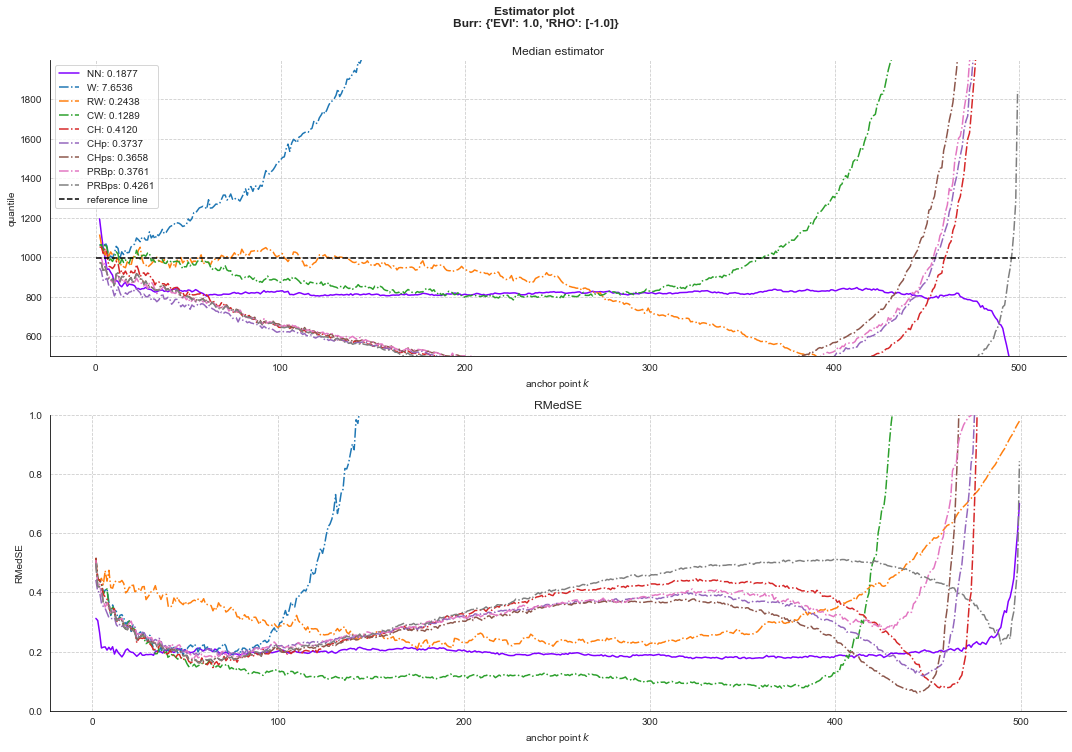

In [52]:
simviz.xquantile_plot(NN="2022-01-22_10-47-52")

### gamma=1 | rho=-2

In [56]:
model_selection_sim(n_replications=500, distribution="burr", params={"evi":1., "rho":[-2.]}, metric="median")

running 2022-01-22_10-48-25 ...


filename        value rmse_bestK
NN_4 variance    2022-01-22_10-48-25  1756.536621    0.16703
     r_variance  2022-01-22_10-48-25      0.00144   0.227175
     mad         2022-01-22_10-48-25     17.24054   0.143228
     r_mad       2022-01-22_10-48-25     0.015901   0.187068
     aad         2022-01-22_10-48-25    29.287941   0.172163
     r_aad       2022-01-22_10-48-25      0.02673   0.232702

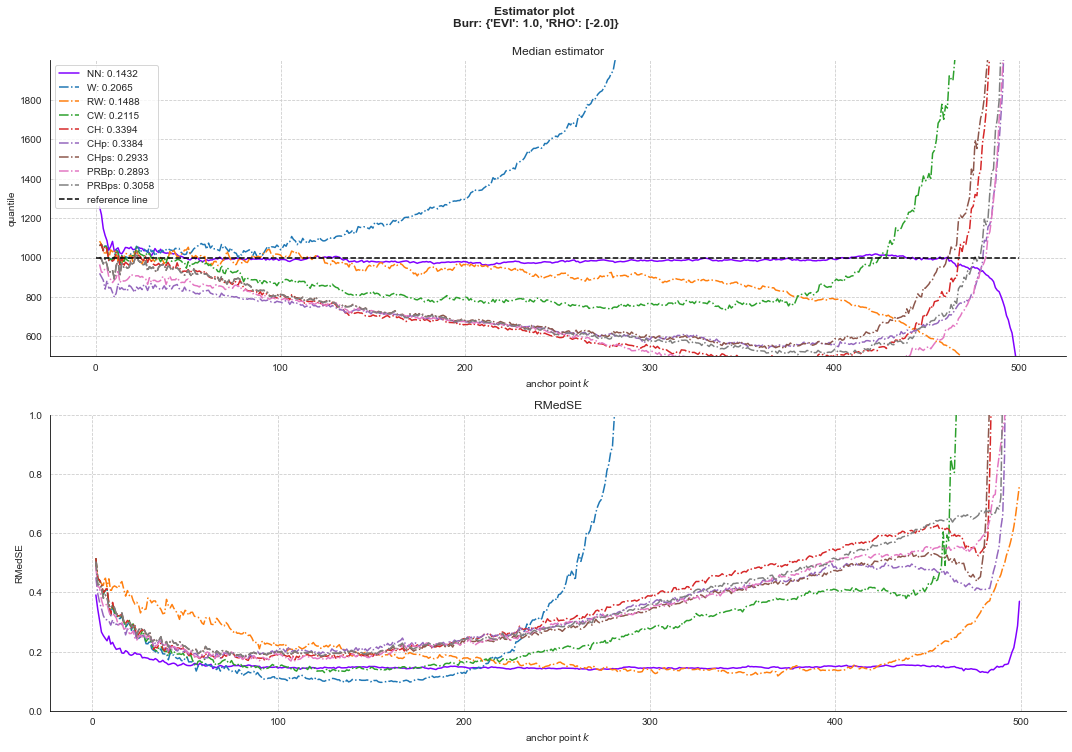

In [57]:
simviz.xquantile_plot(NN="2022-01-22_10-48-25")

### gamma=0.5 | rho=-0.125

In [59]:
model_selection_sim(n_replications=500, distribution="burr", params={"evi":0.5, "rho":[-0.125]})

running 2022-01-21_16-39-25 ...
running 2022-02-01_00-49-31 ...


filename     value rmse_bestK
NN_5 variance    2022-02-01_00-49-31  0.254818   0.535232
     r_variance  2022-02-01_00-49-31  0.008704   0.758844
     mad         2022-02-01_00-49-31  0.286326   0.512866
     r_mad       2022-02-01_00-49-31  0.054171   0.713896
     aad         2022-02-01_00-49-31   0.38793   0.520518
     r_aad       2022-02-01_00-49-31  0.073477   0.727309

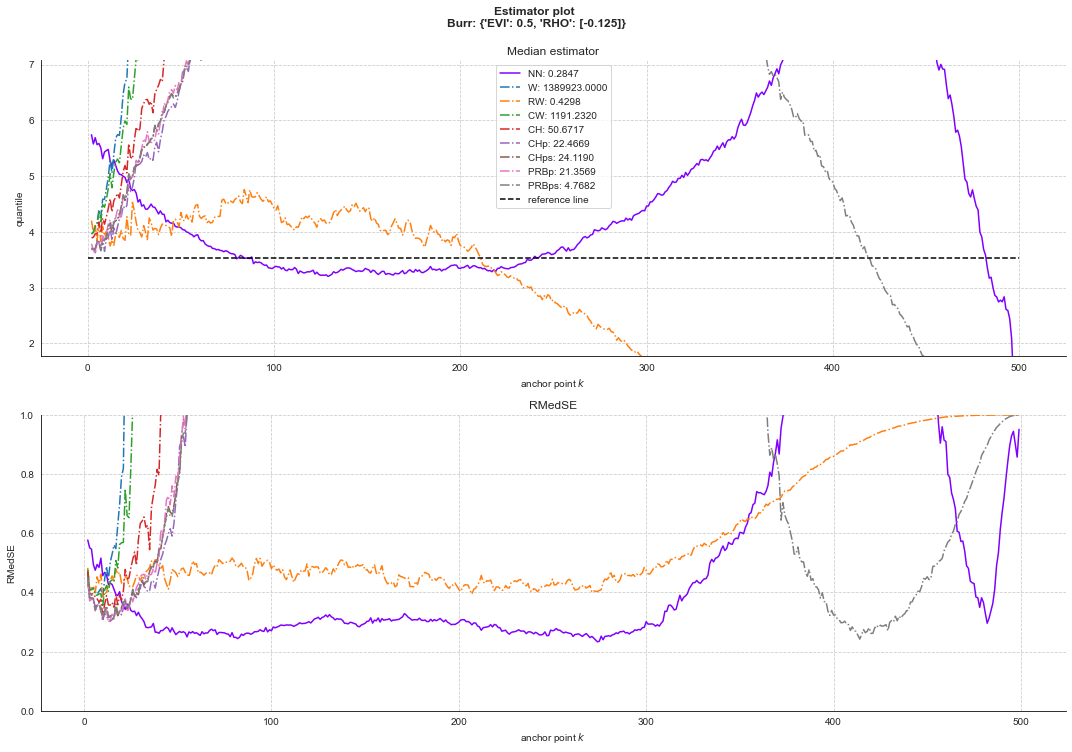

In [60]:
simviz.xquantile_plot(NN="2022-01-21_16-39-25")

### gamma=0.25 | rho=-0.125

In [62]:
model_selection_sim(n_replications=500, distribution="burr", params={"evi":0.25, "rho":[-0.125]})

running 2022-01-21_14-11-19 ...
running 2022-02-01_08-05-18 ...


filename     value rmse_bestK
NN_5 variance    2022-02-01_08-05-18  0.011848   0.149546
     r_variance  2022-02-01_08-05-18  0.002307   0.183444
     mad         2022-02-01_08-05-18  0.062678   0.156684
     r_mad       2022-02-01_08-05-18  0.027576   0.200995
     aad         2022-02-01_08-05-18  0.084704   0.154352
     r_aad       2022-02-01_08-05-18  0.037278   0.174174

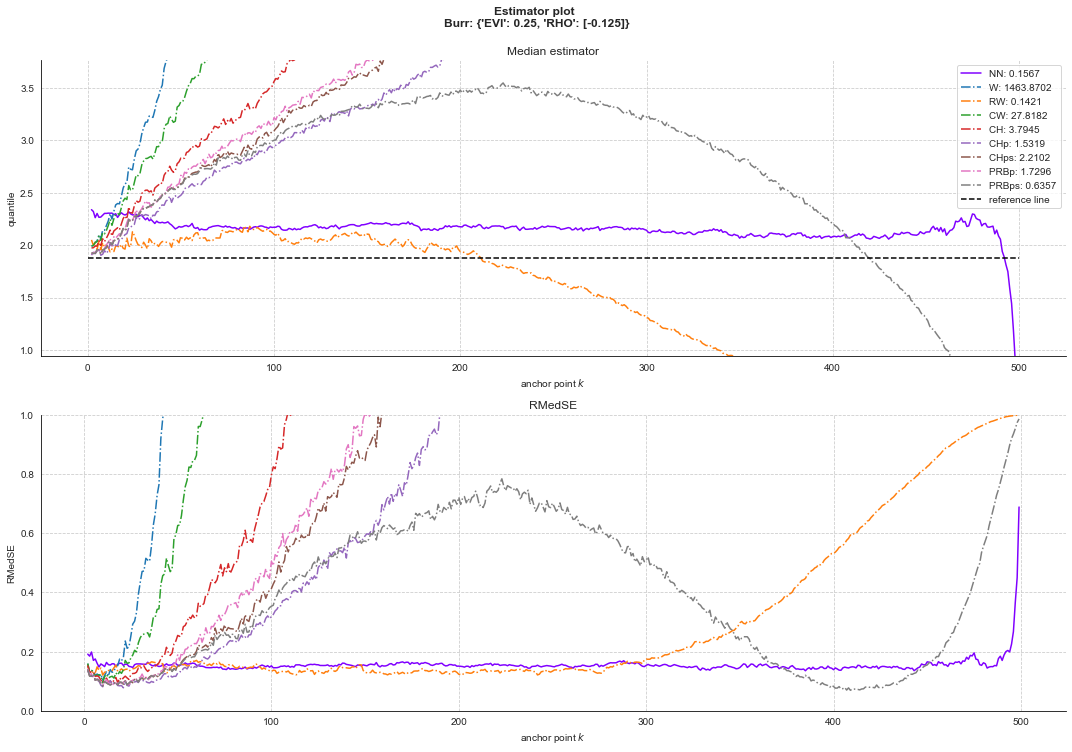

In [63]:
simviz.xquantile_plot(NN="2022-02-01_08-05-18")

### gamma=0.125 | rho=-0.125

In [66]:
model_selection_sim(n_replications=500, distribution="burr", params={"evi":0.125, "rho":[-0.125]})

running 2022-01-21_07-42-17 ...
running 2022-02-02_13-13-31 ...


filename     value rmse_bestK
NN_4 variance    2022-01-21_07-42-17  0.001403   0.039994
     r_variance  2022-01-21_07-42-17  0.000566   0.044017
     mad         2022-01-21_07-42-17  0.021886   0.041058
     r_mad       2022-01-21_07-42-17  0.014135   0.043762
     aad         2022-01-21_07-42-17  0.029484   0.039573
     r_aad       2022-01-21_07-42-17  0.018944   0.043582
NN_5 variance    2022-02-02_13-13-31  0.001278   0.041346
     r_variance  2022-02-02_13-13-31  0.000552   0.043365
     mad         2022-02-02_13-13-31  0.020831    0.03924
     r_mad       2022-02-02_13-13-31  0.013645   0.040561
     aad         2022-02-02_13-13-31   0.02817   0.041346
     r_aad       2022-02-02_13-13-31  0.018213   0.042805

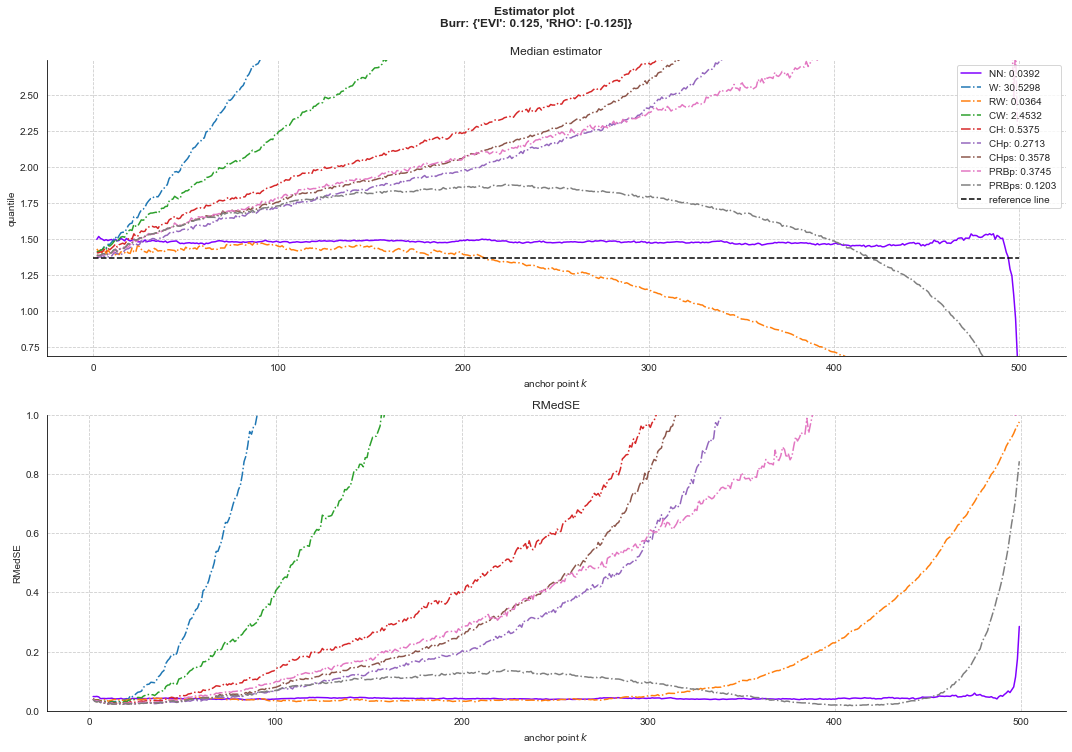

In [68]:
simviz.xquantile_plot(NN="2022-02-02_13-13-31")

## NHW

### gamma=1 | rho=-0.125

In [85]:
model_selection_sim(n_replications=500, distribution="nhw", params={"evi":1., "rho":[-0.125]})

running 2022-01-29_00-38-45 ...
running 2022-01-31_15-09-14 ...


filename         value rmse_bestK
NN_4 variance    2022-01-29_00-38-45  74468.460938   0.219034
     r_variance  2022-01-29_00-38-45      0.003237   0.299503
     mad         2022-01-29_00-38-45    109.246094   0.222331
     r_mad       2022-01-29_00-38-45      0.021112   0.284695
     aad         2022-01-29_00-38-45    199.012413   0.225405
     r_aad       2022-01-29_00-38-45      0.039932   0.307803
NN_5 variance    2022-01-31_15-09-14  59089.074219   0.262738
     r_variance  2022-01-31_15-09-14      0.002688   0.310393
     mad         2022-01-31_15-09-14     88.069702   0.270859
     r_mad       2022-01-31_15-09-14      0.018785    0.31395
     aad         2022-01-31_15-09-14    165.970078   0.275127
     r_aad       2022-01-31_15-09-14      0.035132   0.332227

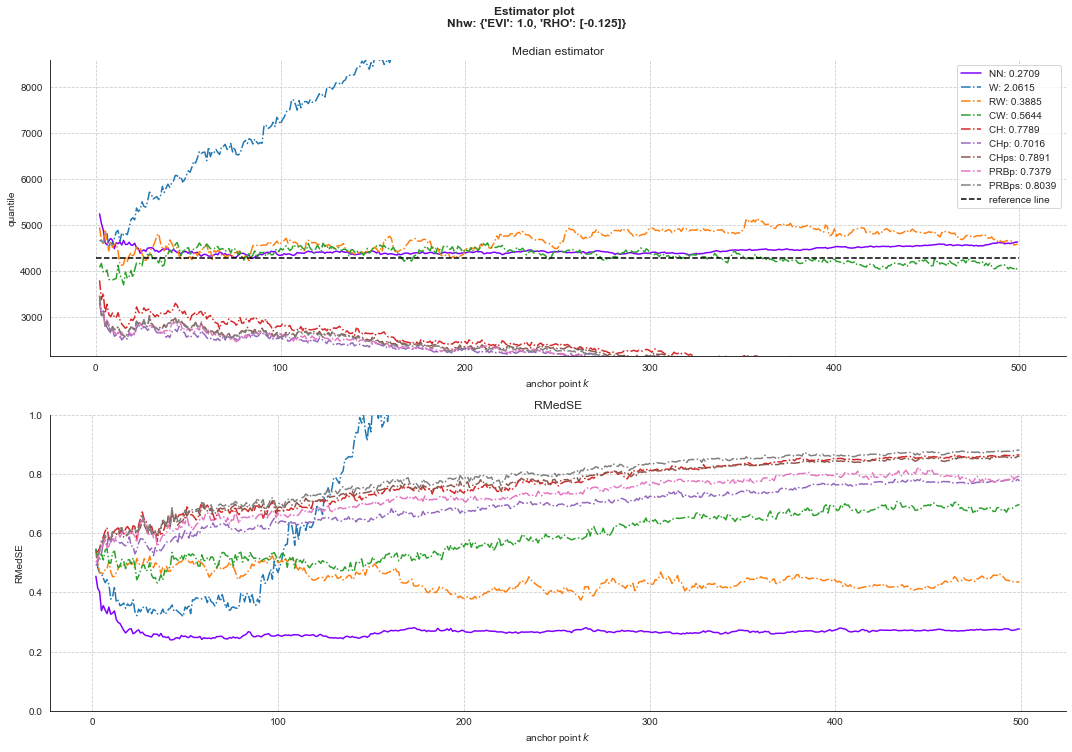

In [86]:
simviz.xquantile_plot(NN="2022-01-31_15-09-14")

### gamma=1 | rho=-0.25

In [81]:
model_selection_sim(n_replications=500, distribution="nhw", params={"evi":1., "rho":[-0.25]})

running 2022-01-29_00-38-16 ...


filename        value rmse_bestK
NN_5 variance    2022-01-29_00-38-16  7021.003906   0.174164
     r_variance  2022-01-29_00-38-16     0.002152   0.213552
     mad         2022-01-29_00-38-16    33.422729   0.216334
     r_mad       2022-01-29_00-38-16     0.017684   0.232555
     aad         2022-01-29_00-38-16    59.924059   0.196387
     r_aad       2022-01-29_00-38-16      0.03243   0.223598

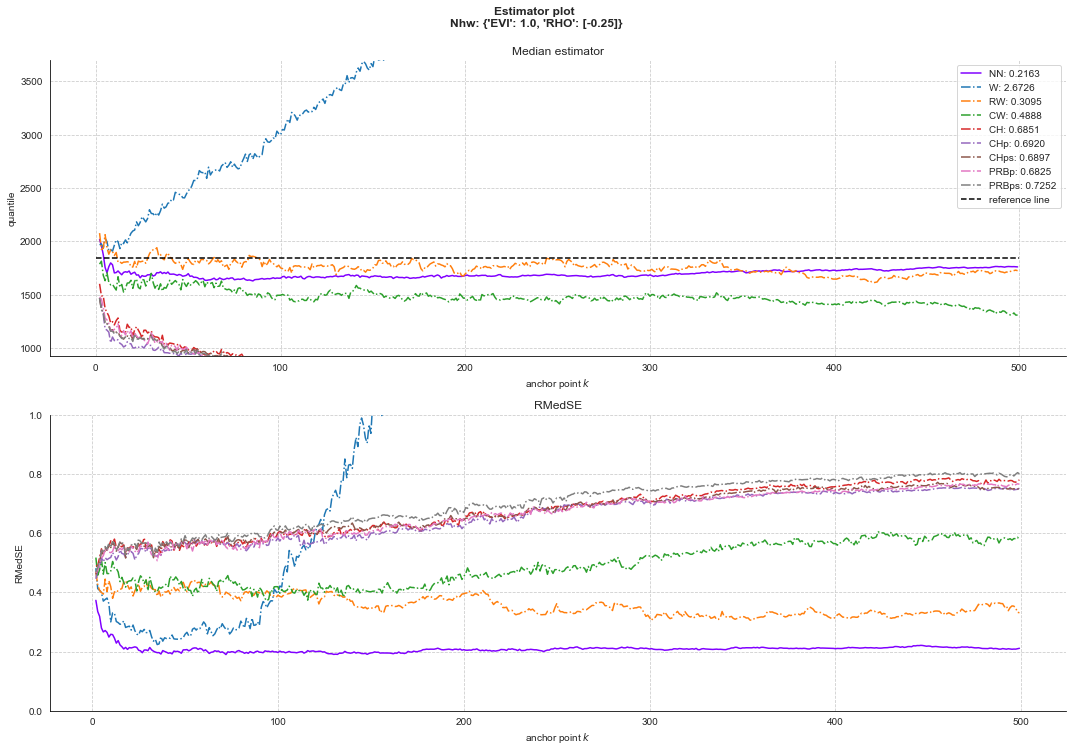

In [83]:
simviz.xquantile_plot(NN="2022-01-29_00-38-16")

### gamma=1 | rho=-0.5

In [78]:
model_selection_sim(n_replications=500, distribution="nhw", params={"evi":1., "rho":[-0.5]})

running 2022-01-31_15-00-58 ...
running 2022-01-29_00-37-50 ...


filename        value rmse_bestK
NN_3 variance    2022-01-31_15-00-58  1157.586914   0.162328
     r_variance  2022-01-31_15-00-58     0.001525   0.150257
     mad         2022-01-31_15-00-58    14.224823   0.161543
     r_mad       2022-01-31_15-00-58      0.01623    0.14787
     aad         2022-01-31_15-00-58    23.933487   0.162094
     r_aad       2022-01-31_15-00-58     0.026919   0.152956
NN_5 variance    2022-01-29_00-37-50  1369.564209   0.186716
     r_variance  2022-01-29_00-37-50     0.001714    0.21655
     mad         2022-01-29_00-37-50     15.48233   0.204913
     r_mad       2022-01-29_00-37-50     0.016256   0.211249
     aad         2022-01-29_00-37-50    26.560777     0.1933
     r_aad       2022-01-29_00-37-50     0.028932   0.219636

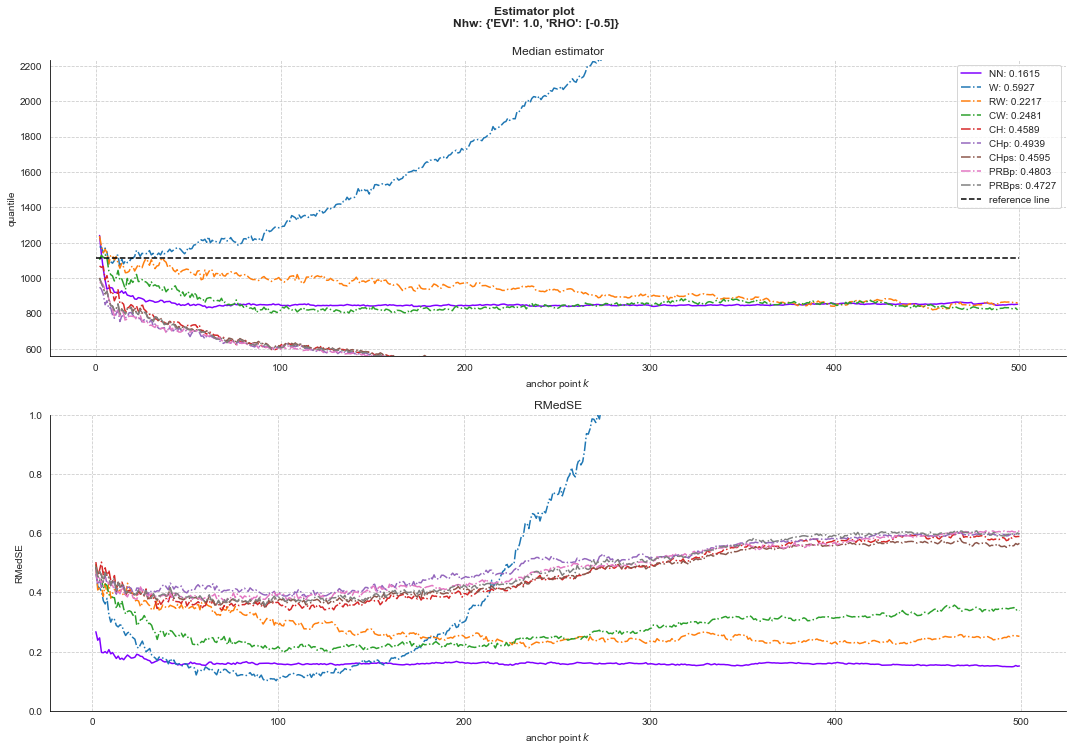

In [79]:
simviz.xquantile_plot(NN="2022-01-31_15-00-58")

### gamma=1 | rho=-1

In [75]:
model_selection_sim(n_replications=500, distribution="nhw", params={"evi":1., "rho":[-1.]})

running 2022-01-31_14-58-48 ...
running 2022-01-29_00-37-06 ...


filename        value rmse_bestK
NN_2 variance    2022-01-31_14-58-48   579.081482   0.176672
     r_variance  2022-01-31_14-58-48     0.001177   0.117099
     mad         2022-01-31_14-58-48    10.675018   0.159631
     r_mad       2022-01-31_14-58-48     0.015157   0.135509
     aad         2022-01-31_14-58-48    16.758463   0.162095
     r_aad       2022-01-31_14-58-48     0.024197   0.127671
NN_5 variance    2022-01-29_00-37-06  1078.053955   0.226993
     r_variance  2022-01-29_00-37-06     0.001482    0.26061
     mad         2022-01-29_00-37-06    13.399063   0.234975
     r_mad       2022-01-29_00-37-06     0.014414   0.257107
     aad         2022-01-29_00-37-06    24.187705   0.227556
     r_aad       2022-01-29_00-37-06     0.026579   0.264668

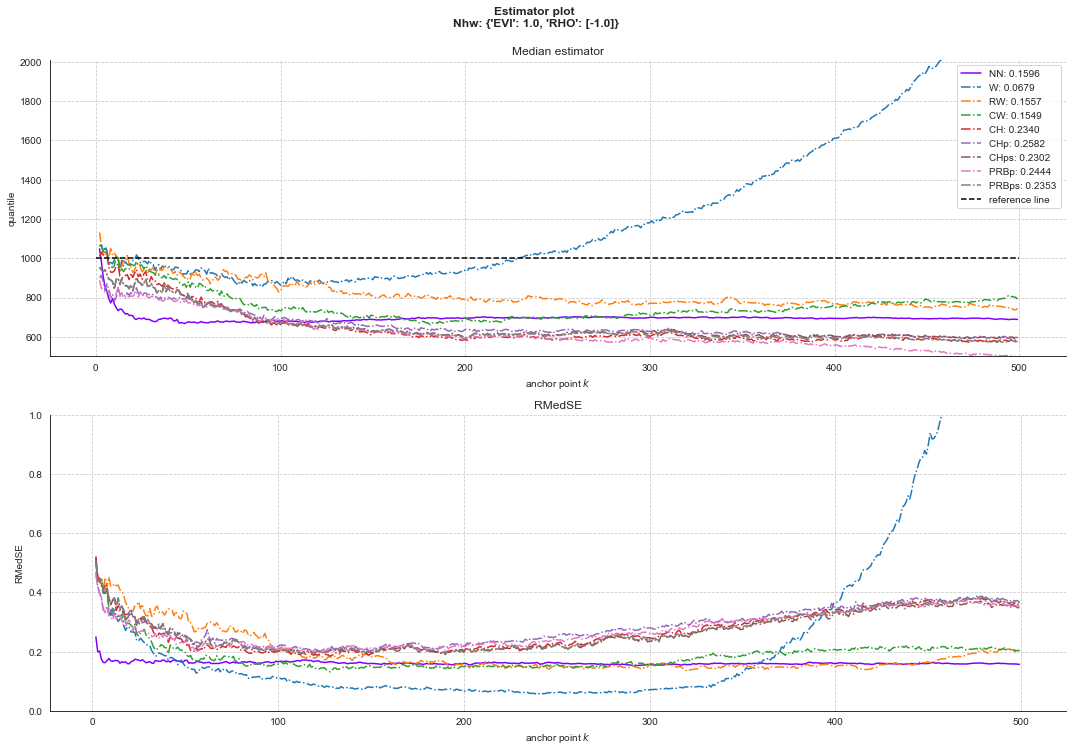

In [77]:
simviz.xquantile_plot(NN="2022-01-31_14-58-48")

## gamma=1 | rho=-2

In [70]:
model_selection_sim(n_replications=500, distribution="nhw", params={"evi":1., "rho":[-2.]})

running 2022-01-29_00-35-42 ...


filename       value rmse_bestK
NN_2 variance    2022-01-29_00-35-42  968.266846   0.117129
     r_variance  2022-01-29_00-35-42    0.001457   0.095894
     mad         2022-01-29_00-35-42   11.658997   0.108228
     r_mad       2022-01-29_00-35-42    0.014749   0.100123
     aad         2022-01-29_00-35-42    20.96612   0.113615
     r_aad       2022-01-29_00-35-42    0.025946   0.095974

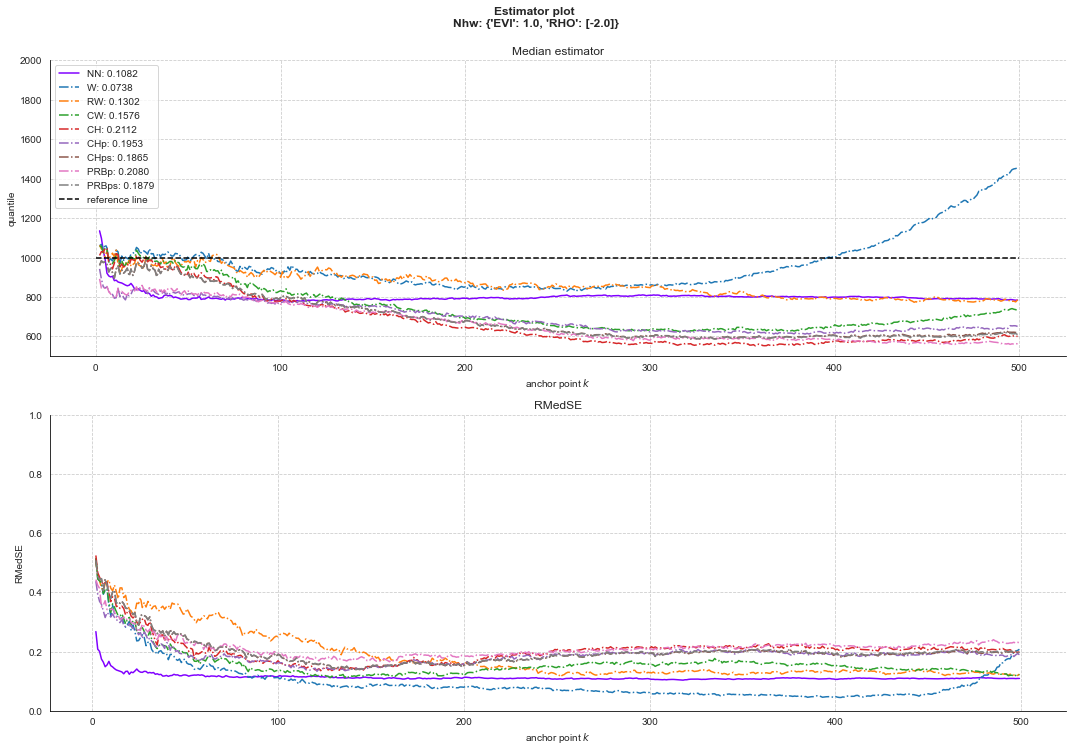

In [72]:
simviz.xquantile_plot(NN="2022-01-29_00-35-42")

### gamma=0.5 | rho=-0.125

In [88]:
model_selection_sim(n_replications=500, distribution="nhw", params={"evi":0.5, "rho":[-0.125]})

running 2022-01-29_00-39-20 ...
running 2022-01-31_15-12-36 ...


filename      value rmse_bestK
NN_5 variance    2022-01-29_00-39-20  25.916121   0.124379
     r_variance  2022-01-29_00-39-20   0.000963   0.158238
     mad         2022-01-29_00-39-20   1.975418   0.116833
     r_mad       2022-01-29_00-39-20   0.012062   0.169376
     aad         2022-01-29_00-39-20   3.639904   0.129753
     r_aad       2022-01-29_00-39-20   0.021683   0.167792

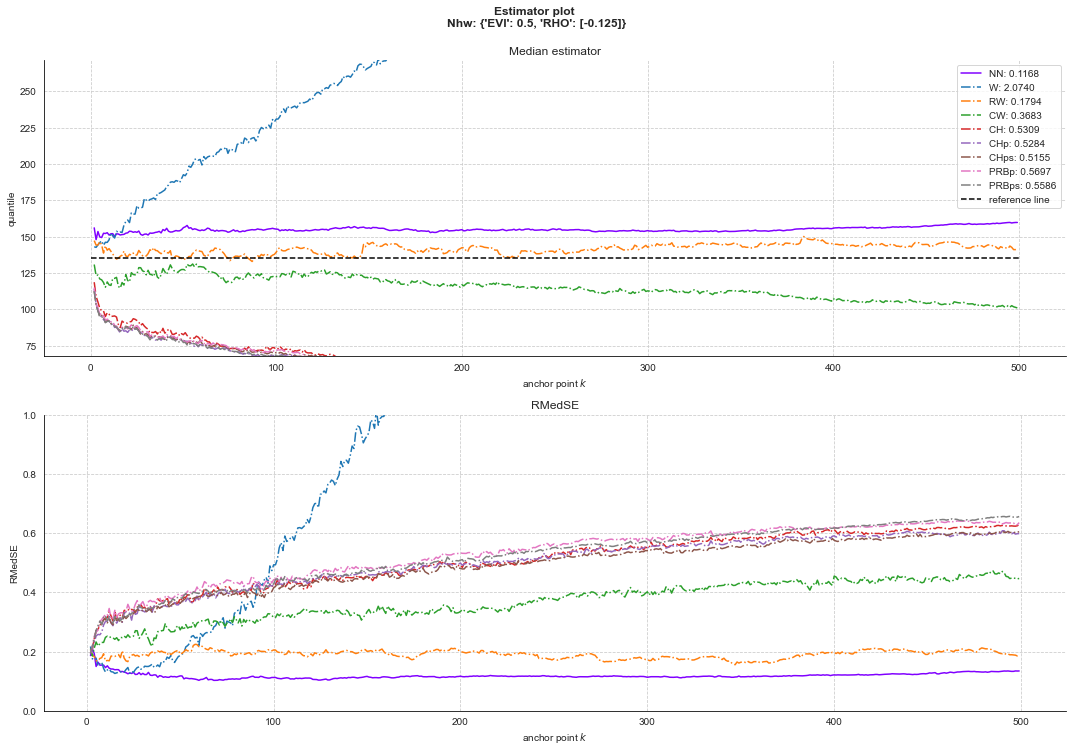

In [90]:
simviz.xquantile_plot(NN="2022-01-29_00-39-20")

### gamma=0.25 | rho=-0.125

In [94]:
model_selection_sim(n_replications=500, distribution="nhw", params={"evi":0.25, "rho":[-0.125]})

running 2022-01-29_00-39-48 ...


filename     value rmse_bestK
NN_5 variance    2022-01-29_00-39-48  0.363553   0.065477
     r_variance  2022-01-29_00-39-48   0.00045   0.107443
     mad         2022-01-29_00-39-48  0.246759   0.056994
     r_mad       2022-01-29_00-39-48   0.00868   0.090829
     aad         2022-01-29_00-39-48  0.429115   0.067028
     r_aad       2022-01-29_00-39-48  0.015256   0.106282

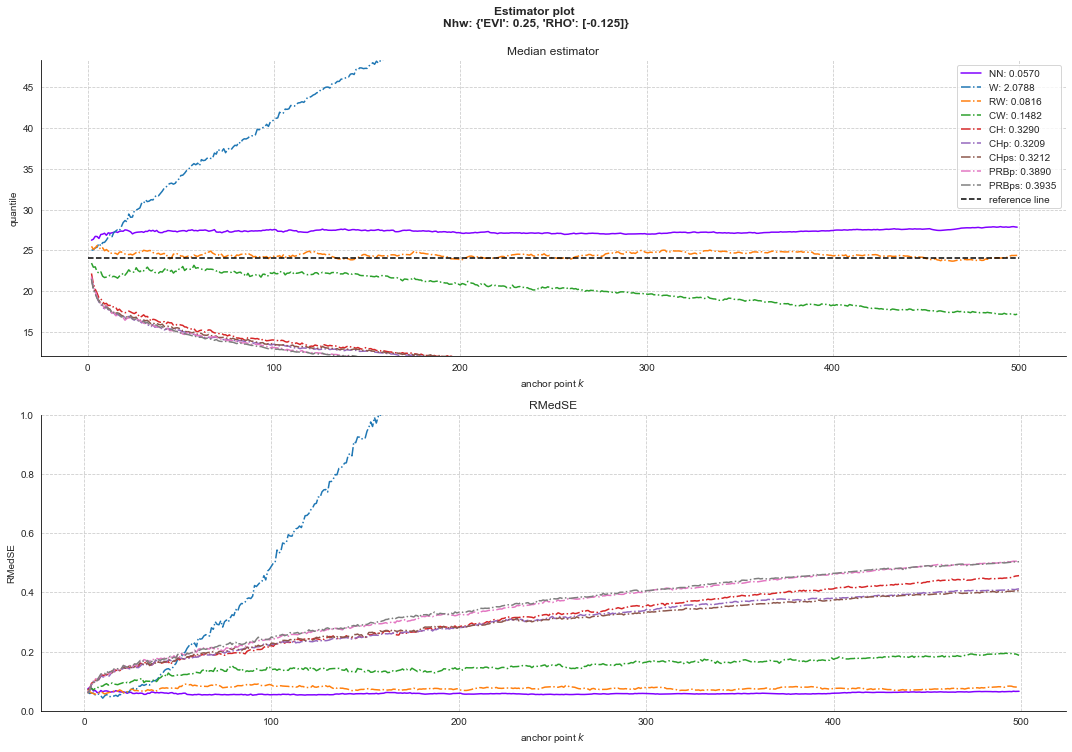

In [147]:
simviz.xquantile_plot(NN="2022-01-29_00-39-48")

### gamma=0.125 | rho=-0.125

In [148]:
model_selection_sim(n_replications=500, distribution="nhw", params={"evi":0.125, "rho":[-0.125]})

running 2022-01-29_00-40-11 ...


filename     value rmse_bestK
NN_5 variance    2022-01-29_00-40-11  0.038957   0.028605
     r_variance  2022-01-29_00-40-11  0.000292    0.03729
     mad         2022-01-29_00-40-11  0.082281   0.027476
     r_mad       2022-01-29_00-40-11   0.00725   0.038341
     aad         2022-01-29_00-40-11  0.143241   0.030261
     r_aad       2022-01-29_00-40-11  0.012418   0.039598

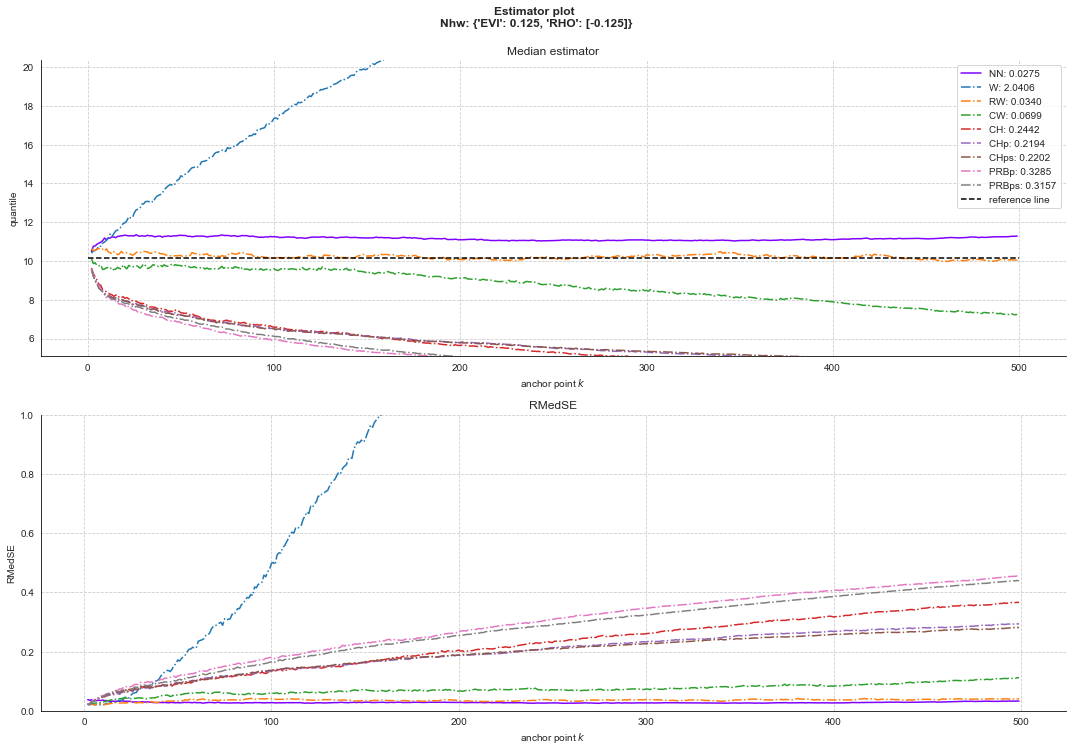

In [149]:
simviz.xquantile_plot(NN="2022-01-29_00-40-11")

## Fisher

### gamma=0.125

In [125]:
model_selection_sim(n_replications=500, distribution="fisher", params={"evi":0.125})

running 2022-01-24_14-06-53 ...


filename     value rmse_bestK
NN_5.0 variance    2022-01-24_14-06-53  0.421482   0.050035
       r_variance  2022-01-24_14-06-53  0.001231   0.055663
       mad         2022-01-24_14-06-53    0.3741   0.050556
       r_mad       2022-01-24_14-06-53  0.020477   0.055866
       aad         2022-01-24_14-06-53  0.504412   0.051116
       r_aad       2022-01-24_14-06-53  0.027648   0.055824

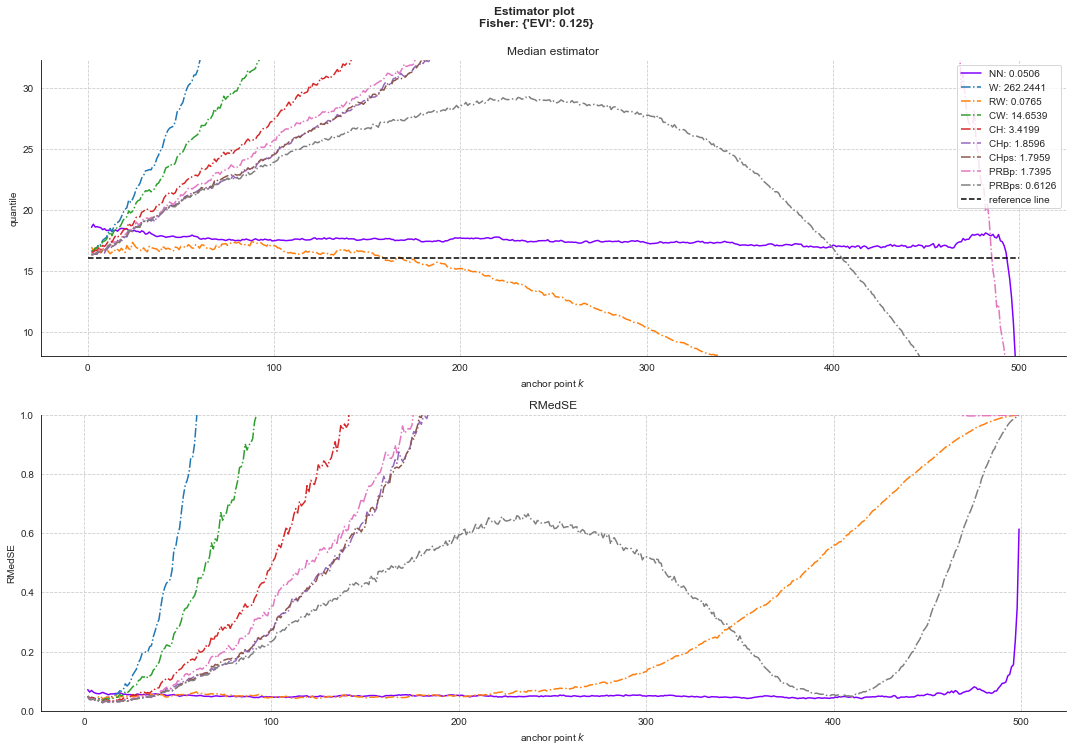

In [161]:
simviz.xquantile_plot(NN="2022-01-24_14-06-53")

### gamma=1

In [150]:
model_selection_sim(n_replications=500, distribution="fisher", params={"evi":1.})

running 2022-01-20_23-33-55 ...
running 2022-02-01_08-07-28 ...


filename        value rmse_bestK
NN_4 variance    2022-01-20_23-33-55  2745.209473   0.240833
     r_variance  2022-01-20_23-33-55     0.002411   0.255271
     mad         2022-01-20_23-33-55    27.900322   0.179168
     r_mad       2022-01-20_23-33-55     0.026293   0.247829
     aad         2022-01-20_23-33-55    40.284609   0.201042
     r_aad       2022-01-20_23-33-55     0.036998   0.252664
NN_5 variance    2022-02-01_08-07-28  3225.666504    0.30284
     r_variance  2022-02-01_08-07-28     0.002432   0.370062
     mad         2022-02-01_08-07-28    28.706818    0.31754
     r_mad       2022-02-01_08-07-28     0.026045   0.388414
     aad         2022-02-01_08-07-28    42.287621   0.303231
     r_aad       2022-02-01_08-07-28      0.03719   0.375703

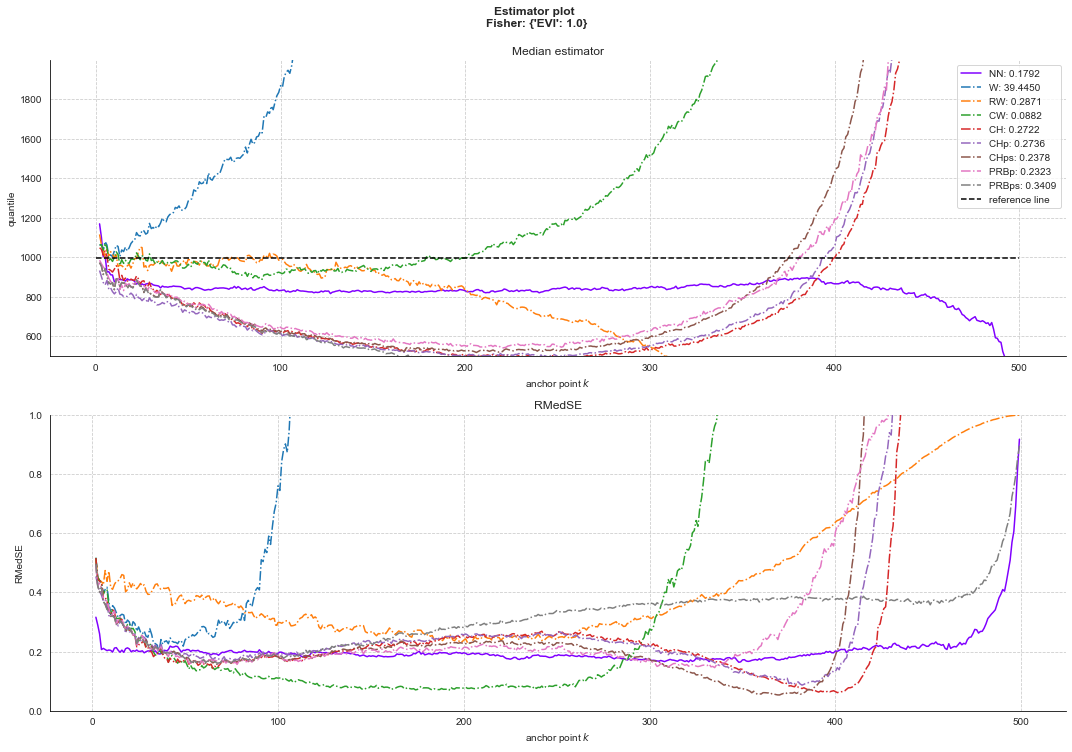

In [160]:
simviz.xquantile_plot(NN="2022-01-20_23-33-55")

## GPD

### gamma=0.125

In [162]:
model_selection_sim(n_replications=500, distribution="gpd", params={"evi":0.125})

running 2022-01-25_04-53-37 ...


filename     value rmse_bestK
NN_5 variance    2022-01-25_04-53-37  0.084231   0.039237
     r_variance  2022-01-25_04-53-37  0.000572    0.04445
     mad         2022-01-25_04-53-37  0.170266   0.039118
     r_mad       2022-01-25_04-53-37  0.013841   0.045308
     aad         2022-01-25_04-53-37  0.227865   0.039398
     r_aad       2022-01-25_04-53-37  0.018645    0.04344

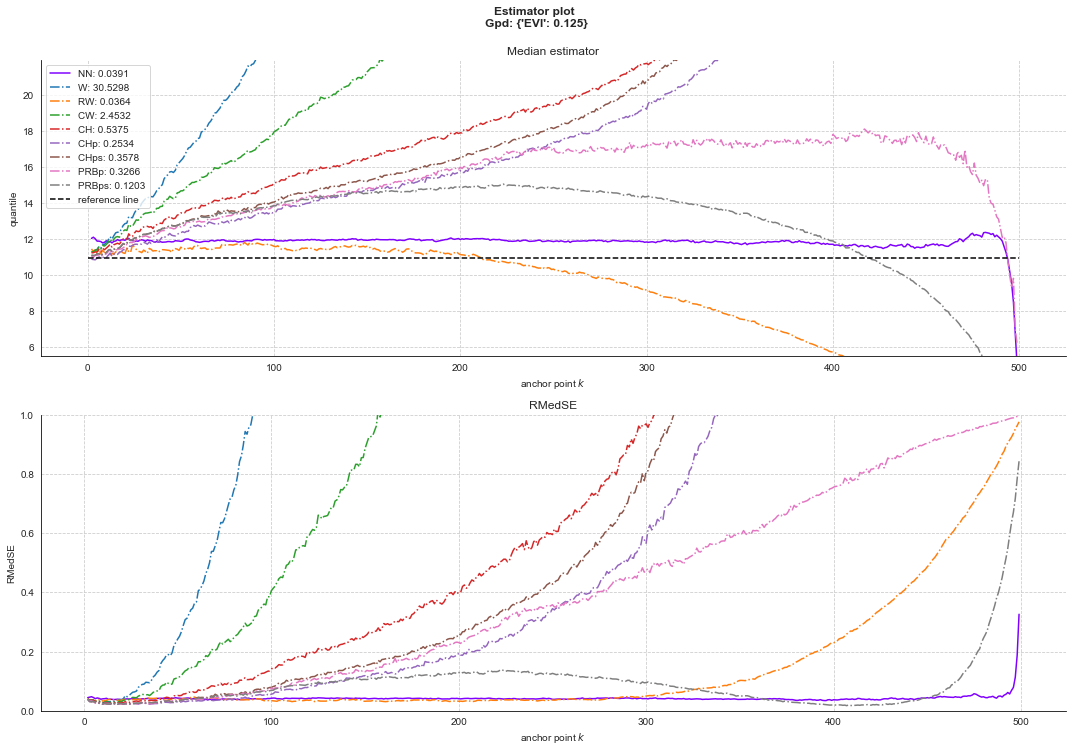

In [163]:
simviz.xquantile_plot(NN="2022-01-25_04-53-37")

## InvGamma

### gamma = 1

In [155]:
model_selection_sim(n_replications=500, distribution="invgamma", params={"evi":1.})

running 2022-02-01_08-09-39 ...
2022-02-01_08-10-21 not complet:  40  files
running 2022-01-18_23-55-44 ...


filename        value rmse_bestK
NN_3 variance    2022-02-01_08-09-39  1615.153809   0.186458
     r_variance  2022-02-01_08-09-39     0.001481   0.190901
     mad         2022-02-01_08-09-39    17.041016   0.186281
     r_mad       2022-02-01_08-09-39     0.016851    0.18874
     aad         2022-02-01_08-09-39    28.122022   0.191383
     r_aad       2022-02-01_08-09-39     0.026963   0.193317
NN_5 variance    2022-01-18_23-55-44  1423.405396   0.299382
     r_variance  2022-01-18_23-55-44     0.001806   0.334255
     mad         2022-01-18_23-55-44    18.844574   0.308259
     r_mad       2022-01-18_23-55-44     0.017588   0.346897
     aad         2022-01-18_23-55-44    29.222157   0.292255
     r_aad       2022-01-18_23-55-44      0.02999   0.328771

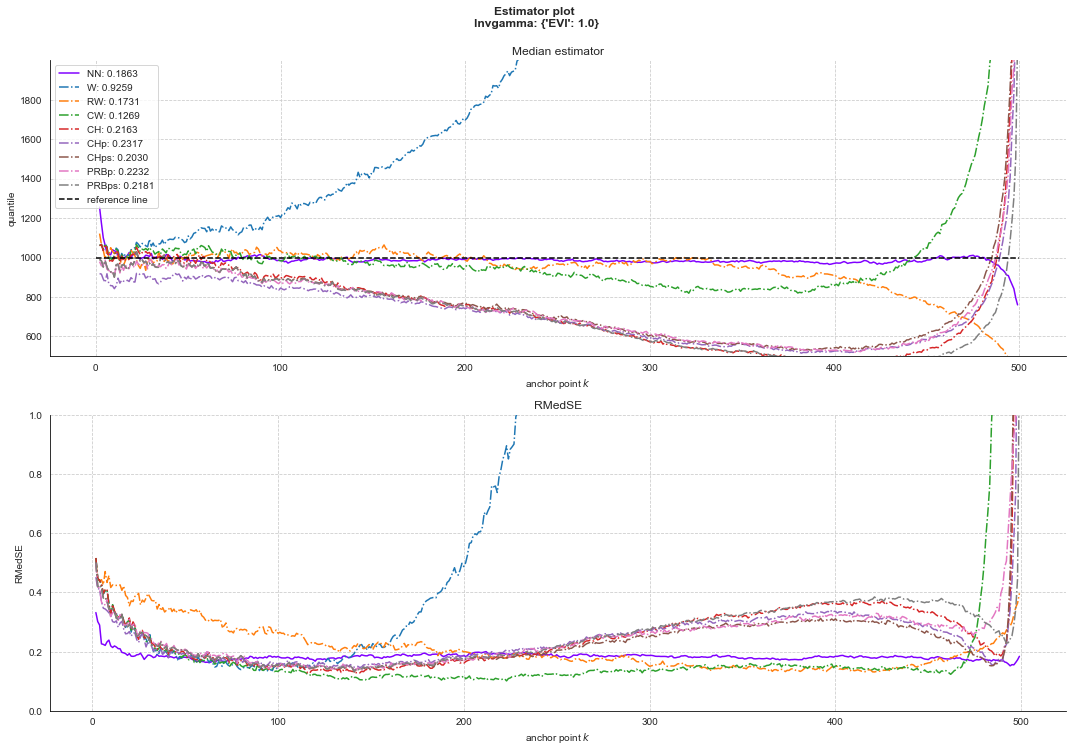

In [156]:
simviz.xquantile_plot(NN="2022-02-01_08-09-39")

## Student

### gamma = 1

In [158]:
model_selection_sim(n_replications=500, distribution="student", params={"evi":1.})

running 2022-02-01_08-10-52 ...
2022-01-18_23-54-22 not complet:  498  files
running 2022-01-20_10-06-16 ...


filename       value rmse_bestK
NN_3 variance    2022-02-01_08-10-52  584.008728   0.181642
     r_variance  2022-02-01_08-10-52    0.001411   0.208247
     mad         2022-02-01_08-10-52   11.145401   0.185118
     r_mad       2022-02-01_08-10-52    0.017274   0.184546
     aad         2022-02-01_08-10-52   17.432493   0.185388
     r_aad       2022-02-01_08-10-52    0.026465    0.20142
NN_4 variance    2022-01-20_10-06-16  614.670776   0.142518
     r_variance  2022-01-20_10-06-16    0.001472   0.165771
     mad         2022-01-20_10-06-16   11.452621    0.15149
     r_mad       2022-01-20_10-06-16    0.017701   0.168956
     aad         2022-01-20_10-06-16   17.921299   0.146543
     r_aad       2022-01-20_10-06-16     0.02776    0.16966

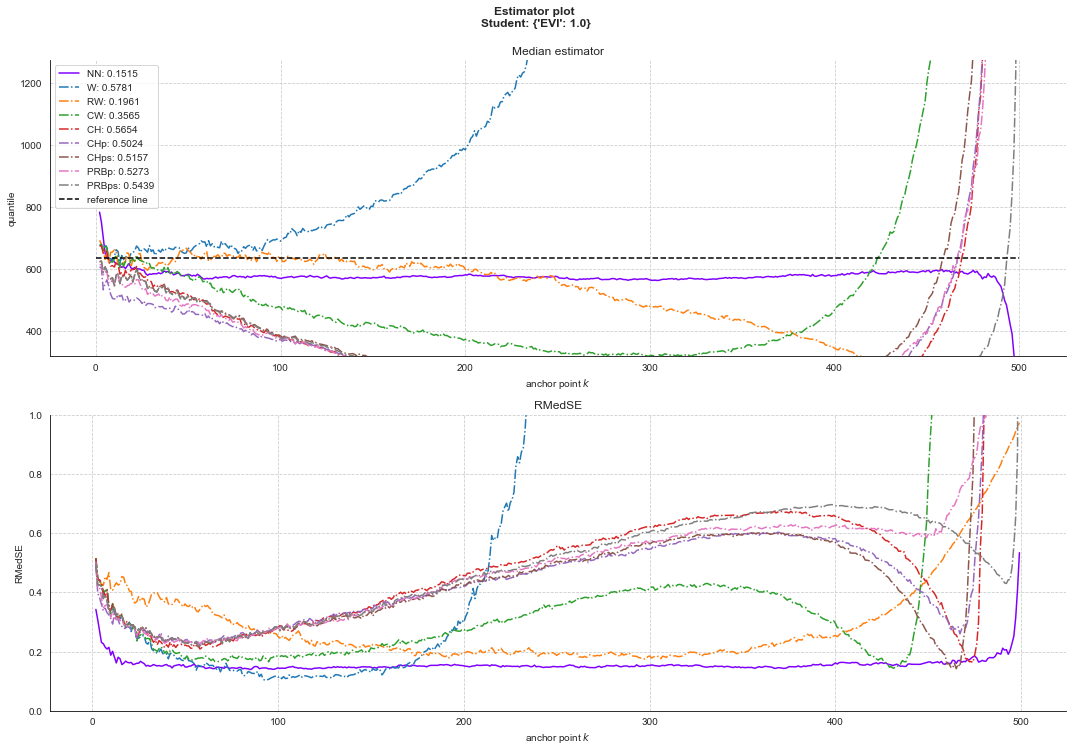

In [159]:
simviz.xquantile_plot(NN="2022-01-20_10-06-16")